# Aplicación de PCA a  de Emisión Acústica y estudio de las variables que contienen información sobre el desgaste de las herramientas de corte

### Importamos las librerías

In [1]:
import pandas as pd
from funciones_mecanizados import pca
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from funciones_mecanizados import normalizar
from funciones_mecanizados import cortar

### Funciones para graficar las componentes principales en 2 y 3D

In [2]:
def plot_pca(datos,alpha, hue):
    #%%grafica 3d
    #%matplotlib notebook
    %matplotlib notebook
    fig = plt.figure(figsize=(6,4))
    ax1 = fig.add_subplot(111, projection='3d')
    if hue=='Herramienta':
        pc_df_H1 = datos[datos['Herramienta']=='H1']
        pc_df_H2 = datos[datos['Herramienta']=='H2']
        pc_df_H3 = datos[datos['Herramienta']=='H3'] 

        ax1.scatter(pc_df_H1['CP1'],pc_df_H1['CP2'],pc_df_H1['CP3'], c='b' , marker='o',alpha=alpha, label='H1')
        ax1.scatter(pc_df_H2['CP1'],pc_df_H2['CP2'],pc_df_H2['CP3'], c='darkorange' , marker='o',alpha=alpha, label='H2')
        ax1.scatter(pc_df_H3['CP1'],pc_df_H3['CP2'],pc_df_H3['CP3'], c='g' , marker='o',alpha=alpha, label='H3')
    if hue=='Etapa':
        pc_df_A = datos[datos['Etapa']=='Agujereado']
        pc_df_E = datos[datos['Etapa']=='Estacionario']
        pc_df_F = datos[datos['Etapa']=='Fresado'] 
        pc_df_S = datos[datos['Etapa']=='Salida']
        
        ax1.scatter(pc_df_A['CP1'],pc_df_A['CP2'],pc_df_A['CP3'], c='b' , marker='o',alpha=alpha, label='Agujereado')
        ax1.scatter(pc_df_E['CP1'],pc_df_E['CP2'],pc_df_E['CP3'], c='g' , marker='o',alpha=alpha, label='Estacionario')
        ax1.scatter(pc_df_F['CP1'],pc_df_F['CP2'],pc_df_F['CP3'], c='red' , marker='o',alpha=alpha, label='Fresado')
        ax1.scatter(pc_df_S['CP1'],pc_df_S['CP2'],pc_df_S['CP3'], c='black' , marker='o',alpha=alpha, label='Salida')
    plt.legend(loc="upper left")
    ax1.tick_params(width=10, labelsize=6, pad=2,labelrotation=0)

    ax1.set_xlabel('CP1', fontsize=14)
    ax1.set_ylabel('CP2', fontsize=14)
    ax1.set_zlabel('CP3', fontsize=14)

    plt.show()   

In [3]:
def plt_pca2d(datos):
    sns.lmplot(x='CP1', y='CP2', data=datos, fit_reg=False, hue='Herramienta', legend=True)

    plt.ylabel('CP2',fontsize=14)
    plt.xlabel('CP1',fontsize=14)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.grid('True')
    plt.show()

### Cargamos el dataset completo normalizado y dividido en mecanizados

In [4]:
h1_norm = pd.read_csv('data/panel1_H1_norm.csv')
h2_norm = pd.read_csv('data/panel2_H2_norm.csv')
h3_norm = pd.read_csv('data/panel1_H3_norm.csv')

columnas = ['P_FRQ', 'RISE', 'COUN', 'ENER', 'DURATION', 'AMP', 'A_FRQ', 'RMS',
       'ASL', 'PCNTS', 'R_FRQ', 'I_FRQ', 'SIG_STRNGTH', 'ABS_ENERGY', 'C_FRQ','P_MARSE']

mecanizados = pd.concat([h1_norm, h2_norm, h3_norm])
mecanizados.reset_index(drop=True, inplace=True)

# PCA
### Se aplica la técnica de PCA con el objetivo de visualizar la estructura de los datos y encontrar divisiones entre las diferentes herramientas de corte. Adicionalmente, se estudian las variables que aportan infromación sobre el desgaste de las herramientas de corte

### Se estudiaron los siguientes casos con y sin el filtro: 
+	Agrupación por desgaste utilizando todas las etapas
+	Agrupación por desgaste utilizando la etapa de Agujereado
+	Agrupación por desgaste utilizando la etapa de Fresado


### Agrupación por desgaste utilizando todas las etapas

In [5]:
# Sin filtro
todo = mecanizados.copy()

todo_pc_df, todo_pca_model = pca(todo, columnas)

# Con filtro
nivel_filtro = 0.1
todo_filtrado = todo.drop(todo[todo['ENER']<nivel_filtro].index, axis=0)
todo_pc_df_filtrado, todo_pca_model_filtrado = pca(todo_filtrado, columnas)


PC_name = list(todo_pc_df.columns.drop(['Herramienta','Mecanizado','CH','Etapa']))

<IPython.core.display.Javascript object>


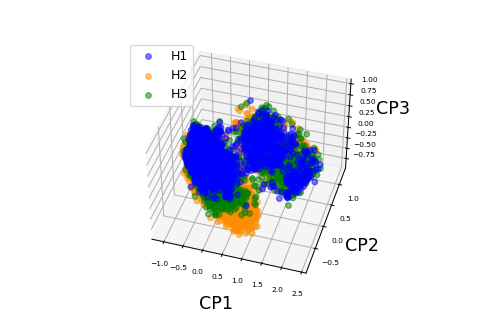

In [20]:
plot_pca(todo_pc_df,0.5,'Herramienta')

<IPython.core.display.Javascript object>


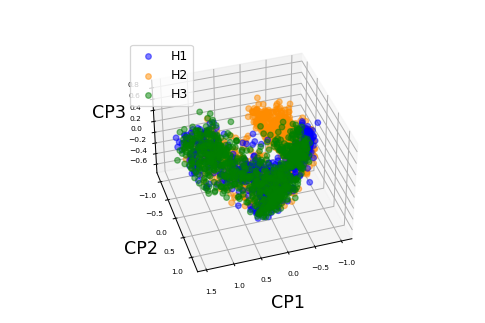

In [21]:
plot_pca(todo_pc_df_filtrado,0.5,'Herramienta')

In [22]:
plot_pca(todo_pc_df,0.7,'Etapa')

<IPython.core.display.Javascript object>

## Agrupación por desgaste utilizando la etapa de Fresado

In [9]:
todo = mecanizados.copy()

etapa= 'Fresado'
fresado = todo[todo['Etapa']==etapa]
#Eliminamos muestras con baja energía
nivel_filtro = 0.1
fresado_filtrado = fresado.drop(fresado[fresado['ENER']<nivel_filtro].index, axis=0)

In [10]:
# Sin filtro
fresado_pc_df, fresado_pca_model = pca(fresado, columnas)

# Con filtro
nivel_filtro = 0.1
fresado_filtrado = fresado.drop(fresado[fresado['ENER']<nivel_filtro].index, axis=0)
fresado_pc_df_filtrado, fresado_pca_model_filtrado = pca(fresado_filtrado, columnas)

<IPython.core.display.Javascript object>


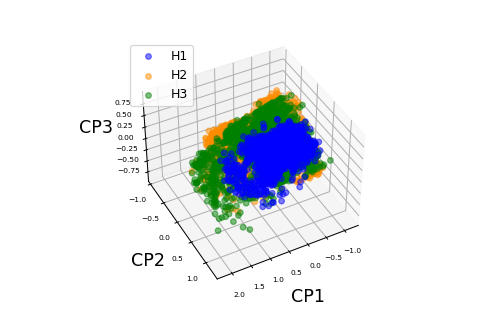

In [23]:
plot_pca(fresado_pc_df,0.5,'Herramienta')

In [24]:
plot_pca(fresado_pc_df_filtrado,0.5,'Herramienta')

<IPython.core.display.Javascript object>

## Agrupación por desgaste utilizando la etapa de Agujereado

In [13]:
todo = mecanizados.copy()

etapa= 'Agujereado'
agujereado = todo[todo['Etapa']==etapa]
#Eliminamos muestras con baja energía
nivel_filtro = 0.1
agujereado_filtrado = agujereado.drop(agujereado[agujereado['ENER']<nivel_filtro].index, axis=0)

In [14]:
# Sin filtro
agujereado_pc_df, agujereado_pca_model = pca(agujereado, columnas)

# Con filtro
nivel_filtro = 0.1
agujereado_filtrado = agujereado.drop(agujereado[agujereado['ENER']<nivel_filtro].index, axis=0)
agujereado_pc_df_filtrado, agujereado_pca_model_filtrado = pca(agujereado_filtrado, columnas)

<IPython.core.display.Javascript object>


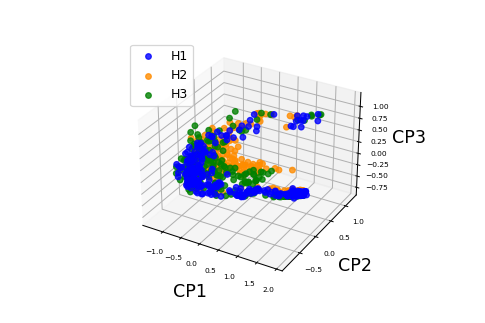

In [25]:
plot_pca(agujereado_pc_df,0.8, hue='Herramienta')

In [26]:
plot_pca(agujereado_pc_df_filtrado,0.8, hue='Herramienta')

<IPython.core.display.Javascript object>

### Análisis de la Etapa  de Fresado

In [27]:
varianza_df = pd.DataFrame({'Varianza':np.round(fresado_pca_model_filtrado.explained_variance_ratio_*100,4), 'CP':PC_name})
cumsum = np.cumsum(fresado_pca_model.explained_variance_ratio_)
dim = np.linspace(0,15,16)
plt.figure(figsize=(10,5))

splot = sns.barplot(x='CP', y='Varianza', data=varianza_df, color='b')
plt.plot(dim,cumsum*100, c='r', linestyle='--', marker='o', label='Varianza acumulada')

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()),
               ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.xlabel('')
plt.legend(loc=2)
plt.ylabel('Varianza Explicada (%)', size=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, axis='y')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


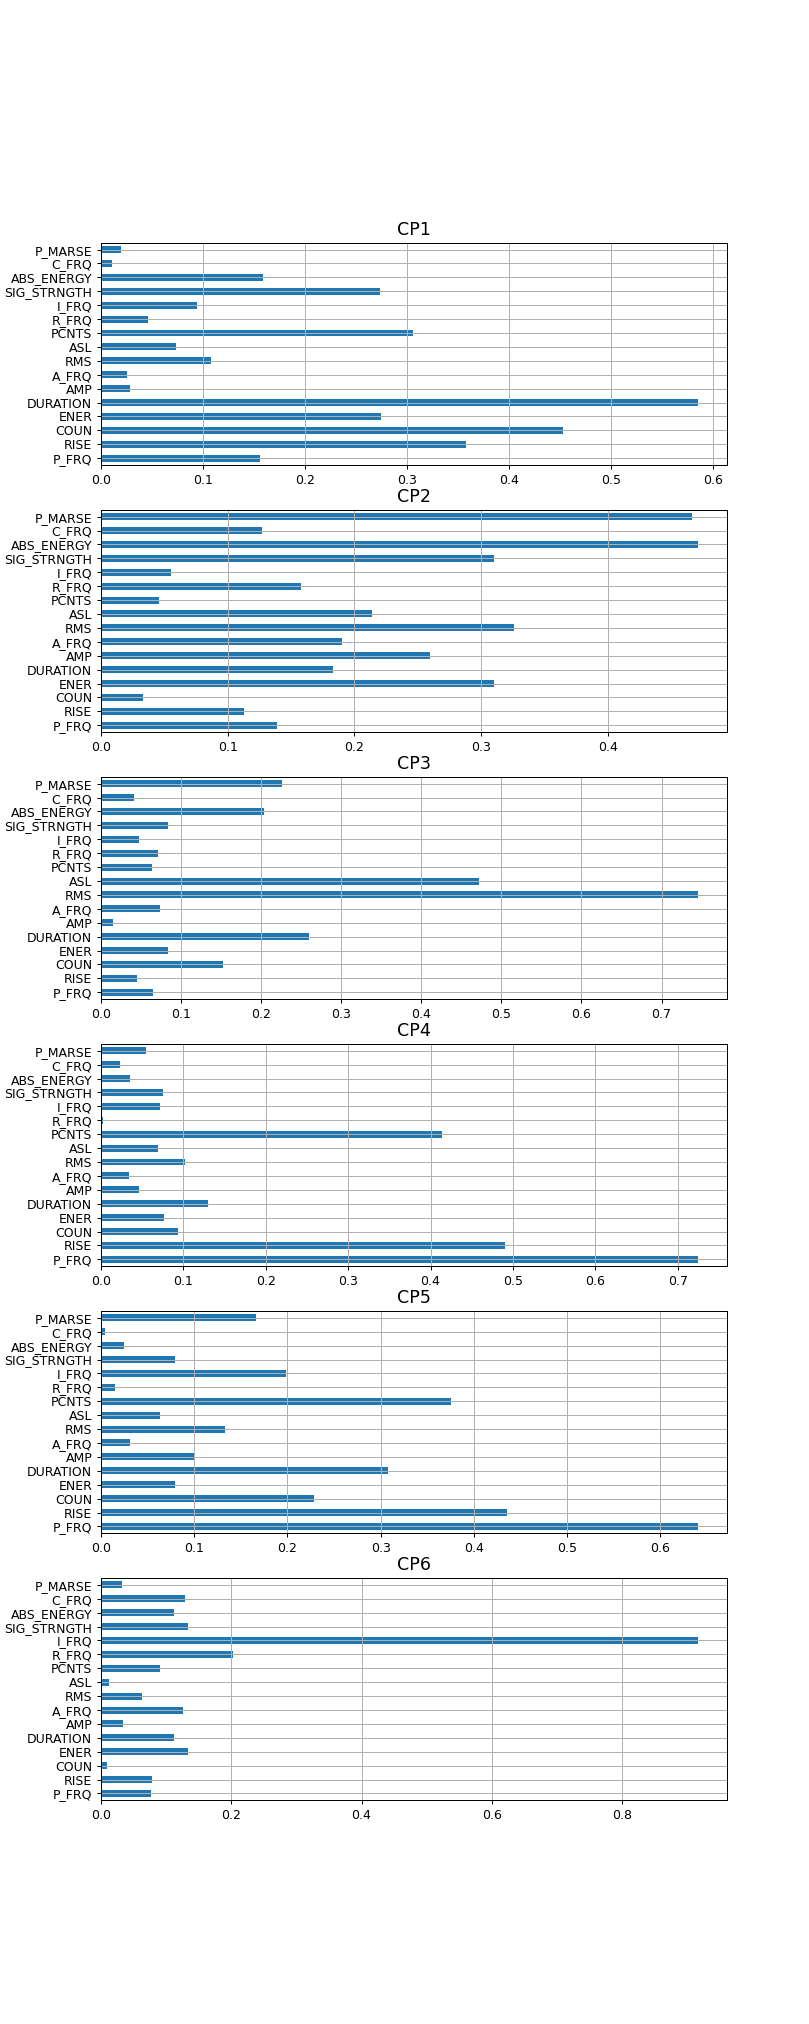

In [29]:
feature_scores = pd.DataFrame(np.round(abs(fresado_pca_model_filtrado.components_),3), columns=columnas, index=PC_name)
feature_scores[0:3]

plt.figure(figsize=(10,25))

plt.subplot(6,1,1)
plt.title('CP1', size=14)
feature_scores.loc['CP1'].plot.barh()
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True)

plt.subplot(6,1,2)
plt.title('CP2', size=14)
feature_scores.loc['CP2'].plot.barh()
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True)

plt.subplot(6,1,3)
plt.title('CP3', size=14)
feature_scores.loc['CP3'].plot.barh()
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True)

plt.subplot(6,1,4)
plt.title('CP4', size=14)
feature_scores.loc['CP4'].plot.barh()
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True)

plt.subplot(6,1,5)
plt.title('CP5', size=14)
feature_scores.loc['CP5'].plot.barh()
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True)

plt.subplot(6,1,6)
plt.title('CP6', size=14)
feature_scores.loc['CP6'].plot.barh()
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True)

In [32]:
todo_pc_df.to_csv(r'data/PCA_data.csv', index=False)

# Menos variables

### Del resultado de la aplicación del PCA, mutual informatión, correlación entre variables y resultados de los algoritmos de clasificación, se eligen seis parámetros y se aplica nuevamente el PCA.

<IPython.core.display.Javascript object>


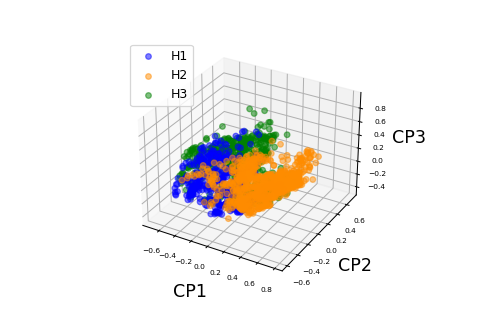

In [55]:
col= ['P_FRQ','RMS','P_MARSE','COUN','I_FRQ']

# Sin filtro
fresado_pc_df, fresado_pca_model = pca(fresado, col)

# Con filtro
nivel_filtro = 0.1
fresado_filtrado = fresado.drop(fresado[fresado['ENER']<nivel_filtro].index, axis=0)
fresado_pc_df_filtrado, fresado_pca_model_filtrado = pca(fresado_filtrado, col)

plot_pca(fresado_pc_df_filtrado,0.5,'Herramienta')

<IPython.core.display.Javascript object>


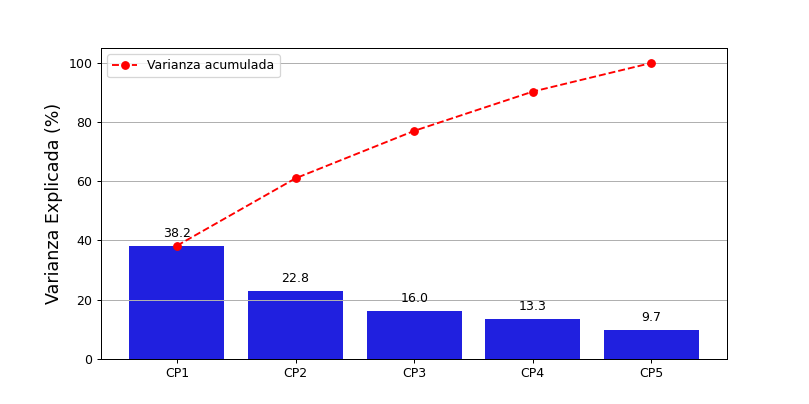

In [56]:
PC_name = list(fresado_pc_df.columns.drop(['Herramienta','Mecanizado','CH','Etapa']))
varianza_df = pd.DataFrame({'Varianza':np.round(fresado_pca_model_filtrado.explained_variance_ratio_*100,4), 'CP':PC_name})
cumsum = np.cumsum(fresado_pca_model_filtrado.explained_variance_ratio_)
dim = np.linspace(0,4,5)
plt.figure(figsize=(10,5))

splot = sns.barplot(x='CP', y='Varianza', data=varianza_df, color='b')
plt.plot(dim,cumsum*100, c='r', linestyle='--', marker='o', label='Varianza acumulada')

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()),
               ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.xlabel('')
plt.legend(loc=2)
plt.ylabel('Varianza Explicada (%)', size=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, axis='y')

<IPython.core.display.Javascript object>


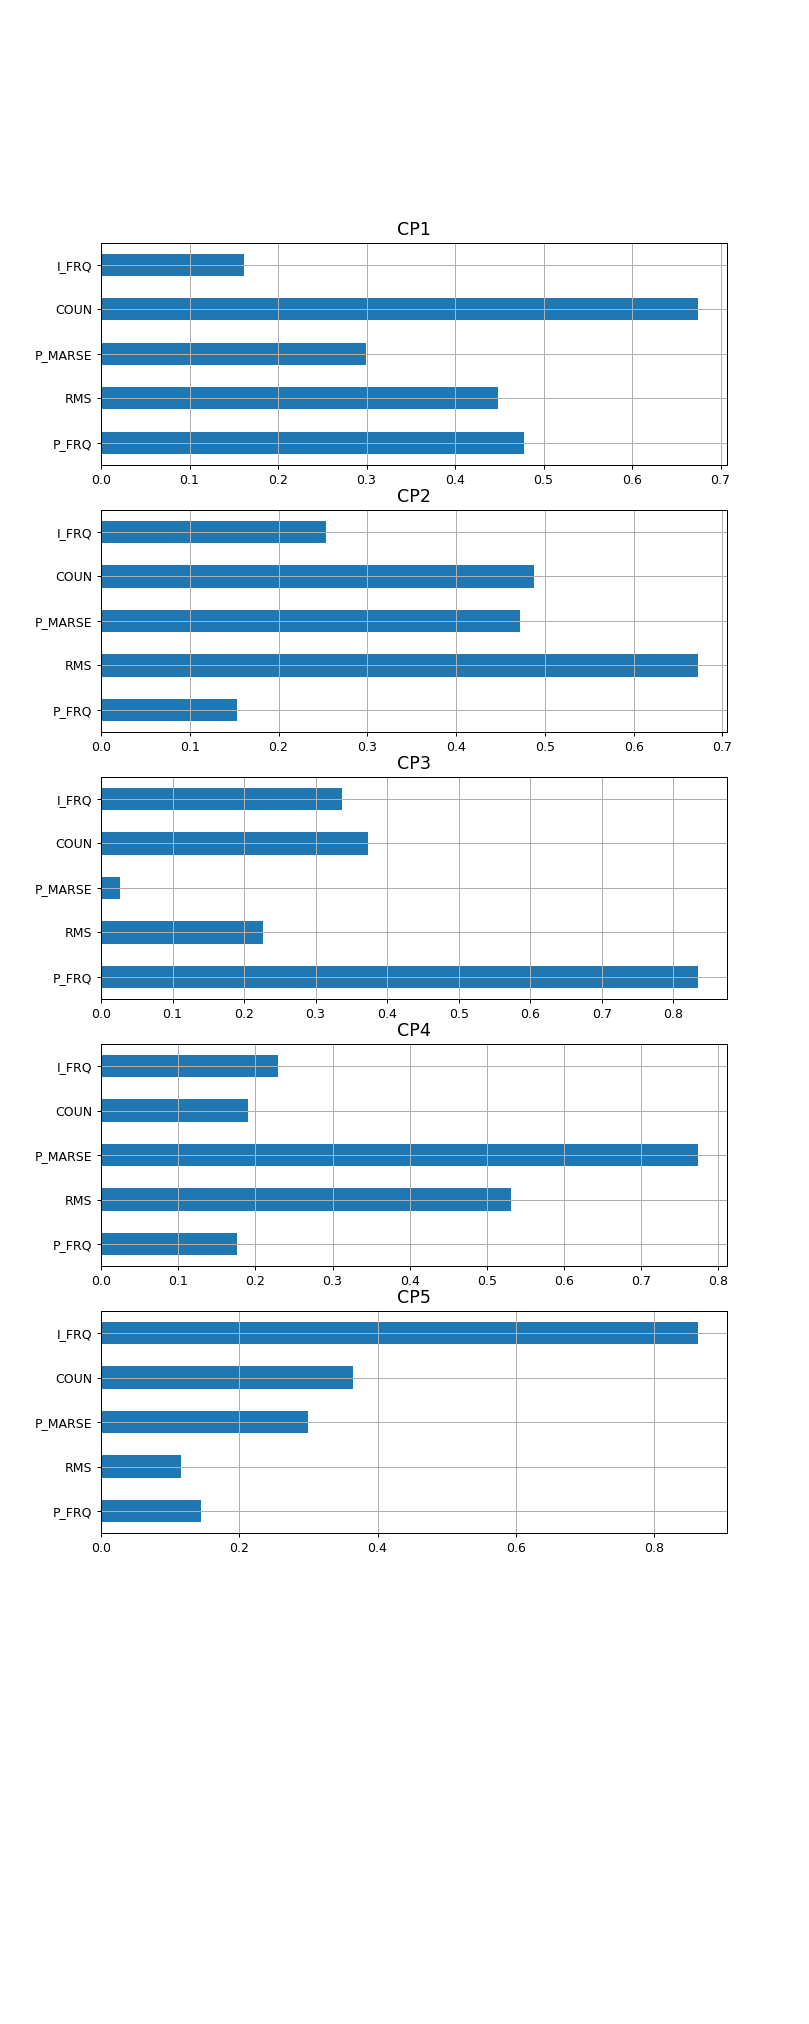

In [57]:
feature_scores = pd.DataFrame(np.round(abs(fresado_pca_model_filtrado.components_),3), columns=col, index=PC_name)
feature_scores[0:3]

plt.figure(figsize=(10,25))

plt.subplot(6,1,1)
plt.title('CP1', size=14)
feature_scores.loc['CP1'].plot.barh()
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True)

plt.subplot(6,1,2)
plt.title('CP2', size=14)
feature_scores.loc['CP2'].plot.barh()
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True)

plt.subplot(6,1,3)
plt.title('CP3', size=14)
feature_scores.loc['CP3'].plot.barh()
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True)

plt.subplot(6,1,4)
plt.title('CP4', size=14)
feature_scores.loc['CP4'].plot.barh()
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True)

plt.subplot(6,1,5)
plt.title('CP5', size=14)
feature_scores.loc['CP5'].plot.barh()
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True)
